YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


ADF Statistic: 0.7973432406329866
p-value: 0.9915931616933967


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

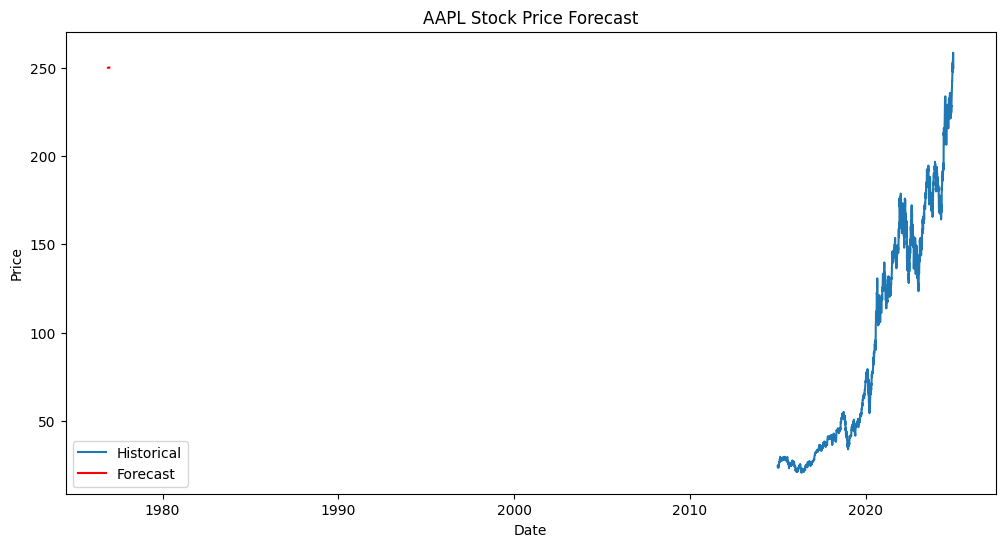

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 1: Data Collection
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2025-01-01')
close_prices = data['Close']

# Step 2: Stationarity Check
result = adfuller(close_prices.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Step 3: Differencing (if needed)
diff_prices = close_prices.diff().dropna()

# Step 4: Model Identification (Assume p=1, d=1, q=1 for illustration)
model = ARIMA(close_prices, order=(1, 1, 1))

# Step 5: Model Fitting
model_fit = model.fit()

# Step 6: Forecasting
forecast = model_fit.forecast(steps=30)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()